In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
terrorism_filepath = "..\\EDA_Terrorism\\globalterrorism.csv"
data = pd.read_csv(terrorism_filepath, low_memory = False, encoding='ISO-8859-1')

In [3]:
print('The dataset documents', data.shape[0], 'terror attacks with', data.shape[1], 'different features')

The dataset documents 181691 terror attacks with 135 different features


## Renaming columns and dropping unrelated columns

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type'},inplace=True)

data['Casualties'] = data.Killed + data.Wounded

data=data[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualties','Target','Group','Target_type','Weapon_type']]

data.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualties,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [5]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualties     16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

## Number of attacks yearly

C:\Users\Dhruv\Machine-Learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


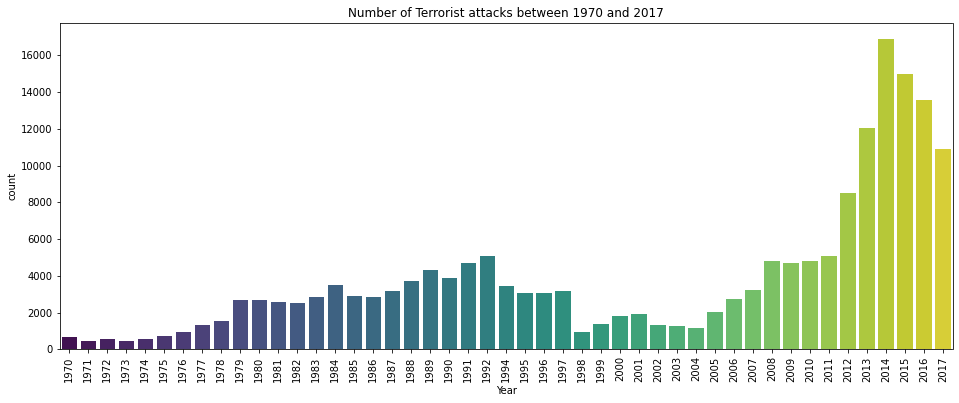

In [6]:
plt.figure(figsize=(16,6))
sns.countplot(data.Year, palette="viridis")
plt.xticks(rotation=90)
plt.title("Number of Terrorist attacks between 1970 and 2017")
plt.show()

Here we can see a huge increase the number of terrorist activity from the year 2013 which is likely due to militant groups Islamic State, al-Qaeda, Boko Haram and the Taliban.

In April 2013, Baghdadi did something dramatic: He asserted unilateral control over all al-Qaeda operations in both Syria and Iraq. To demonstrate this change, he renamed AQI "the Islamic State in Iraq and Greater Syria" — or ISIS, for short. The formation or re-emergence of ISIS had a huge role to play in the increased number of terrorist attacks.
Source: https://www.vox.com/2015/11/19/9760284/isis-history


## Number of Casualities

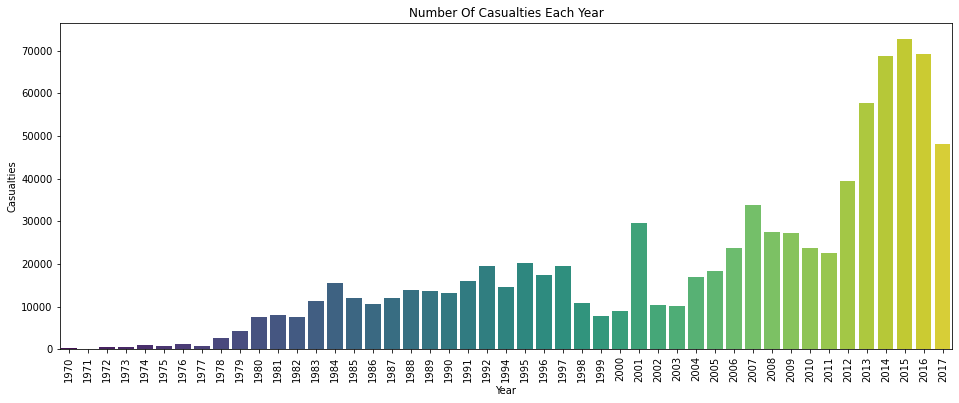

In [7]:
plt.figure(figsize=(16,6))
cas_yearly = data.groupby('Year').Casualties.sum().to_frame().reset_index()
cas_yearly.columns = ['Year','Casualties']
sns.barplot(x=cas_yearly.Year, y=cas_yearly.Casualties, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number Of Casualties Each Year')
plt.show()

Here we see that increased casualties correspond to the increasing trend in terrorist activites we saw.
The unusually high value for the year 2001 can be related to the September 11 attacks where the Islamic extremist group al Qaeda hijacked four airplanes and carried out suicide attacks against targets in the United States. Two of the planes were flown into the twin towers of the World Trade Center in New York City, a third plane hit the Pentagon just outside Washington, D.C., and the fourth plane crashed in a field in Shanksville, Pennsylvania.

## Terrorist attacks based on Region

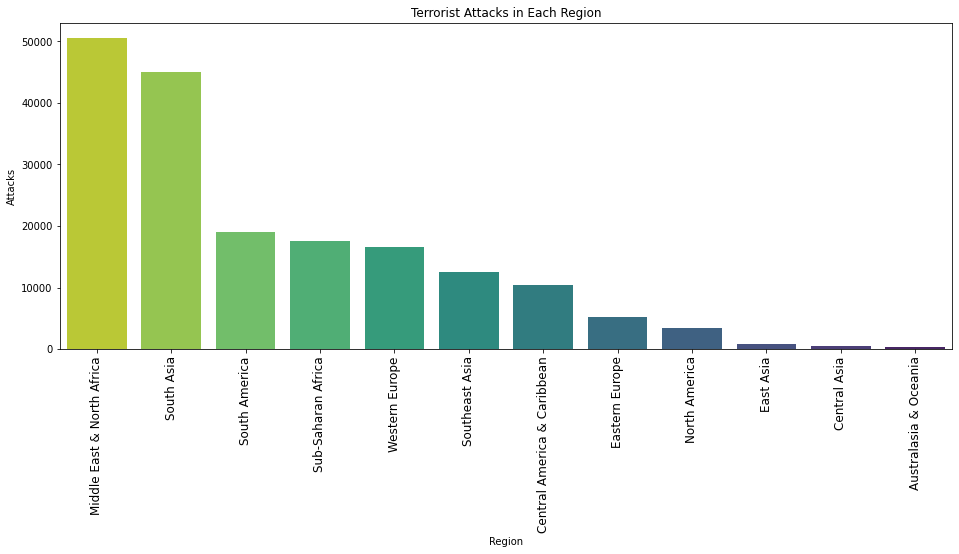

In [8]:
plt.figure(figsize=(16,6))
region_atk = data.Region.value_counts().to_frame().reset_index()
region_atk.columns = ['Region', 'Attacks']
sns.barplot(x=region_atk.Region, y=region_atk.Attacks, palette="viridis_r")
plt.title("Terrorist Attacks in Each Region")
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.show()

Here we can see that the Middle-East and South Asia had the most number of terrorist attacks which corresponds to our theory that the militant groups Islamic State, al-Qaeda, Boko Haram and the Taliban which are primarily based in the Middle East are responsible for the attacks.

## Total Number of Attacks in Top 20 Countries

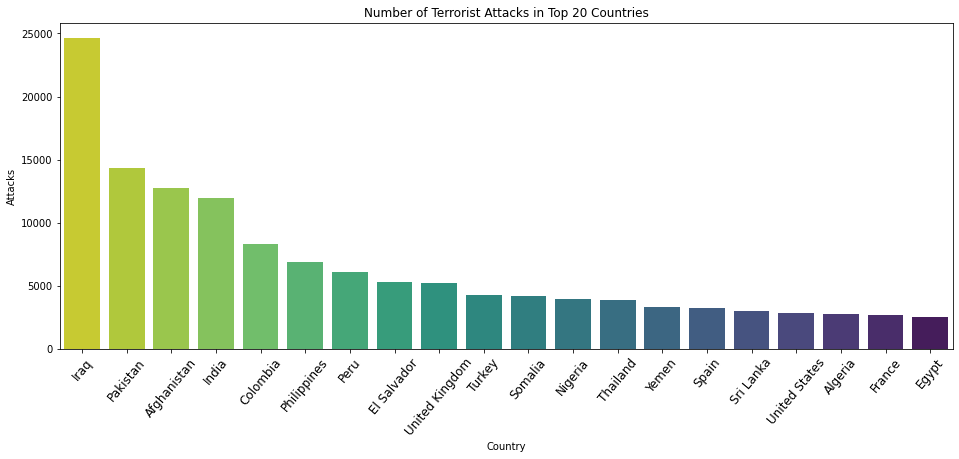

In [9]:
plt.figure(figsize=(16,6))
country_atk = data.Country.value_counts().to_frame().reset_index()
country_atk.columns = ["Country", "Attacks"]
sns.barplot(x=country_atk.Country[:20], y=country_atk.Attacks, palette="viridis_r")
plt.title("Number of Terrorist Attacks in Top 20 Countries")
plt.xticks(fontsize=12)
plt.xticks(rotation=50)
plt.show()

We see that Iraq, pakistan and Afghanistan were the top 3 countries. This confirm our previous observation that Middle-East had the most attacks.
We see that Iraq was the no 1 country which confirms our hypothesis that ISIS had a major role in terrorism. 

## Number of casualities per country

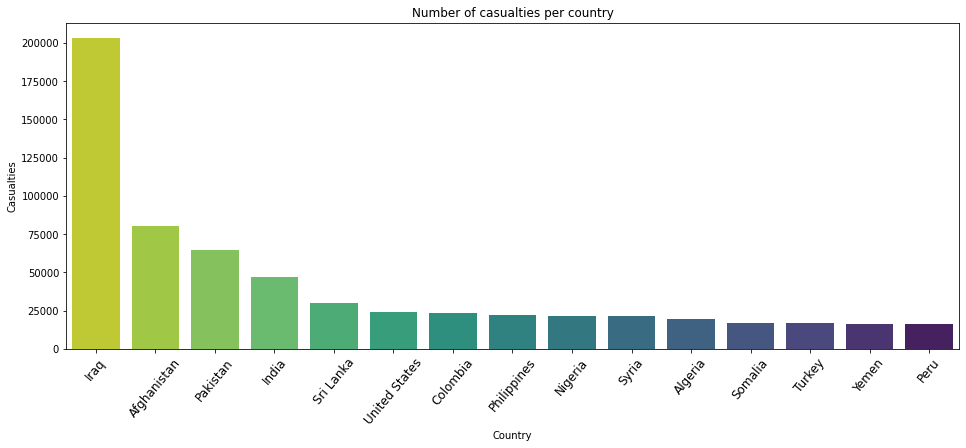

In [10]:
plt.figure(figsize=(16,6))
country_atk = data.groupby("Country").Casualties.sum().to_frame().reset_index().sort_values('Casualties', ascending=False)
country_atk.columns = ["Country", "Casualties"]
sns.barplot(x=country_atk.Country[:15], y=country_atk.Casualties, palette="viridis_r")
plt.title("Number of casualties per country")
plt.xticks(fontsize=12)
plt.xticks(rotation=50)
plt.show()

Iraq had by far the most number of casualties. Since 1970, 200000 people have been injured or killed due to terrorism in the country. 

## Number of Casualties per city

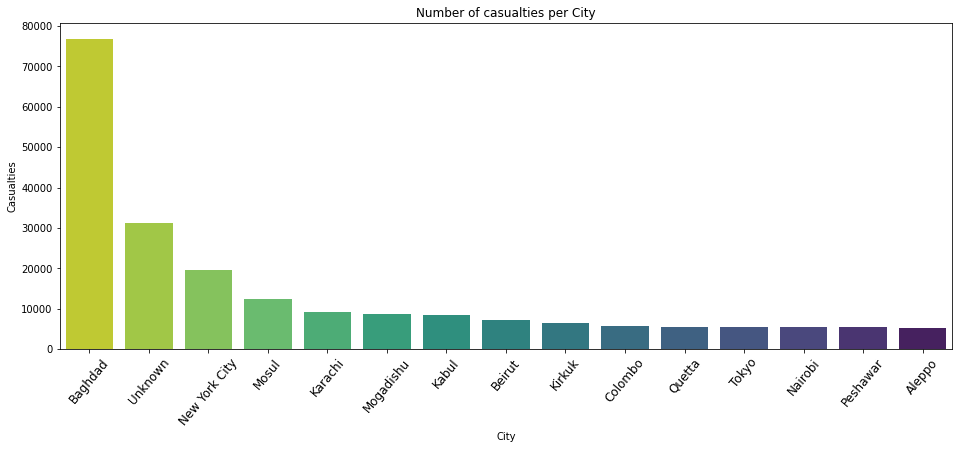

In [11]:
plt.figure(figsize=(16,6))
City_atk = data.groupby("City").Casualties.sum().to_frame().reset_index().sort_values('Casualties', ascending=False)
City_atk.columns = ["City", "Casualties"]
sns.barplot(x=City_atk.City[:15], y=City_atk.Casualties, palette="viridis_r")
plt.title("Number of casualties per City")
plt.xticks(fontsize=12)
plt.xticks(rotation=50)
plt.show()

Here we can see that Baghdad, the capital of Iraq had the most casualties wrt any other city.

## Most Common Attack Types

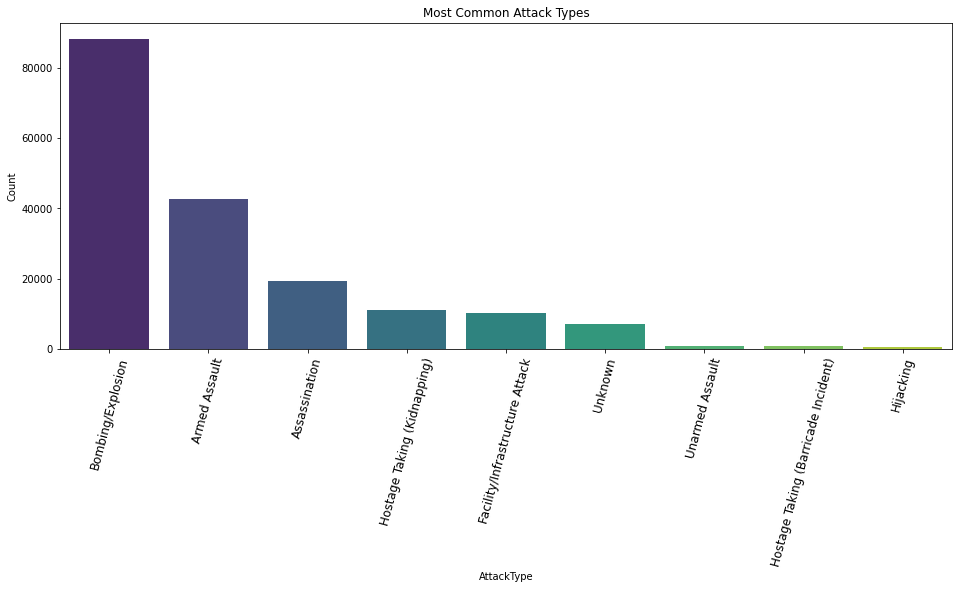

In [12]:
plt.figure(figsize=(16,6))
region_atk = data.AttackType.value_counts().to_frame().reset_index()
region_atk.columns = ["AttackType", "Count"]
sns.barplot(x=region_atk.AttackType, y=region_atk.Count, palette="viridis")
plt.title("Most Common Attack Types")
plt.xticks(fontsize=12)
plt.xticks(rotation=75)
plt.show()

## Terrorist Groups with Most Attacks

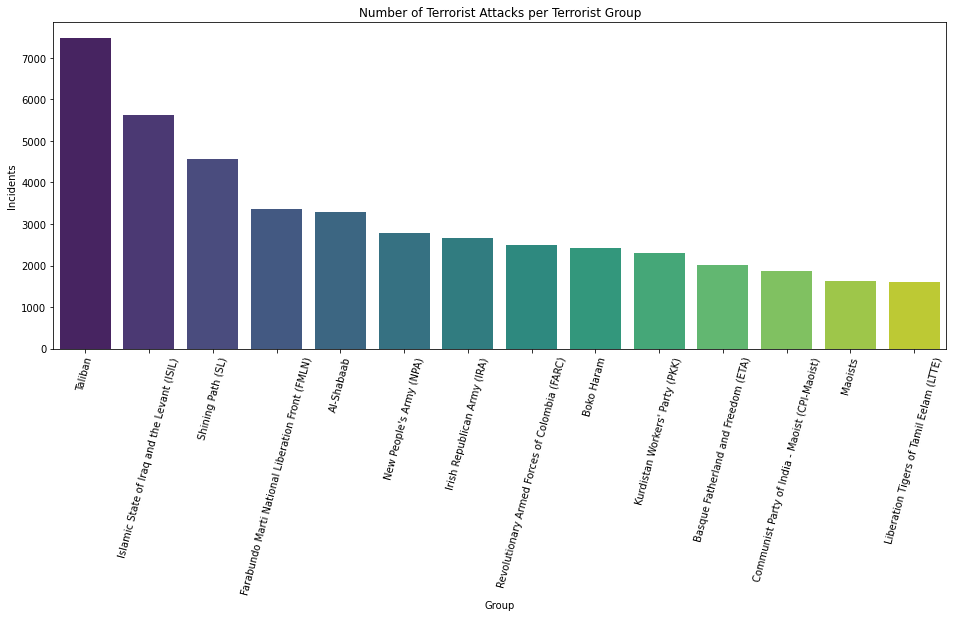

In [13]:
plt.figure(figsize=(16,6))
group = data.Group.value_counts().to_frame().reset_index()[1:15]
group.columns = ["Group", "Incidents"]
sns.barplot(x=group.Group, y=group.Incidents, palette="viridis")
plt.title("Number of Terrorist Attacks per Terrorist Group")
plt.xticks(rotation=75)
plt.show()

Here we can see that most of the top groups are based in Iraq and thus Iraq has suffered the most from terrorism.<br>
Another fascinating group is the Irish Republican Army (IRA). The IRA conducted  bombings, assassinations, kidnappings, punishment beatings, extortion, smuggling, and robberies before cease-fire in 1997.<br><br>
Note: Values with Unknown groups have been dropped for this graph

## Some Stats:

In [14]:
print(f"No of Casualties: {data.Casualties.sum()}")
print(f"No of Deaths: {data.Killed.sum()}")

No of Casualties: 872892.0
No of Deaths: 411868.0


 ### Since 1970 over 872892 have suffered injuries due to terrorism out of which 411868 have lost their life.